# Build the neural network

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

C:\Users\Luigi\Anaconda3\envs\wekeo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


We define our model as a subclass of nn.Module by implementing the methods init() and forward(). Our model has three layers: two hidden layers with a ReLU activation function and a linear output layer. The output of one layer is the input of the following one. The first layer accepts as input a tensor of size 28x28 float numbers, that can be an image of 28x28 pixels, and the output is a tensor of size 512. The 2nd layer has input size 512 and same output size. The final layer has an input of size 512 and output 10. This layer provided the probabilistic interpretation of the model that maps an image to a set of 10 prbabability values each associated to one of the classes of the FashionMNIST dataset. 

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


The model can be called passing as input a tensor that represents a batch of images. In this case the batch contains only one tensor of 28x28 random values.

In [5]:
batch_size = 1
X = torch.rand(batch_size, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7])


We try with a minibatch of 3 28x28 tensors of random values

In [6]:
input_tensor = torch.rand(3,28,28)
print(input_tensor.size())

torch.Size([3, 28, 28])


We can see what a tensor of random values looks like by transforming it into an image

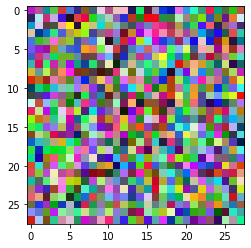

In [7]:
import matplotlib.pyplot as plt
to_pil_image = transforms.ToPILImage()
img = to_pil_image(input_tensor)
plt.imshow(img)

### Flatten layer

In [9]:
flatten = nn.Flatten()
flat_image = flatten(input_tensor)
print(flat_image.size())

torch.Size([3, 784])


### Linear layer

In [10]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### Non-linear activation ReLU

In [11]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0491,  0.0229, -0.0251,  0.0440, -0.5135,  0.2814,  0.1575, -0.1150,
         -0.3286, -0.1887, -0.2296, -0.5831, -0.3966, -0.0027, -0.4715, -0.0915,
         -0.3761,  0.0578, -0.2238, -0.2766],
        [ 0.1435, -0.4425, -0.1570, -0.3035, -0.1567,  0.6458,  0.1894, -0.1225,
         -0.3606,  0.0027, -0.1388, -0.5248, -0.3707,  0.1288, -0.1717, -0.1613,
          0.1815,  0.0298, -0.2147, -0.1304],
        [ 0.1943, -0.4423,  0.1770, -0.0952,  0.0448,  0.2304,  0.2188,  0.0604,
          0.0626,  0.0556, -0.3486, -0.6757, -0.5735, -0.0848, -0.2228,  0.1515,
          0.0841, -0.4212, -0.1072, -0.0018]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0229, 0.0000, 0.0440, 0.0000, 0.2814, 0.1575, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0578,
         0.0000, 0.0000],
        [0.1435, 0.0000, 0.0000, 0.0000, 0.0000, 0.6458, 0.1894, 0.0000, 0.0000,
         0.0027, 0.0000, 0.0000, 0.0000, 0.1288, 0.00

### Sequential model

In [13]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [14]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [15]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0214, -0.0050,  0.0152,  ..., -0.0286,  0.0302,  0.0049],
        [-0.0105,  0.0027,  0.0233,  ..., -0.0265,  0.0156,  0.0278]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0221,  0.0352], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0390, -0.0266, -0.0012,  ..., -0.0101, -0.0162, -0.0180],
        [-0.0243, -0.0135, -0.0194,  ..., -0.0258, -0.0035,  0.0384]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 